In [ ]:
!pip install q kaggle

**Create Directory**

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


**Copy File**

In [ ]:
!cp kaggle.json ~/.kaggle

**Read and Write permission to owner only**

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

**Download kaggle dataset**

In [ ]:
!kaggle datasets download -d saurabhshahane/fake-news-classification

fake-news-classification.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip fake-news-classification.zip

Archive:  fake-news-classification.zip
replace WELFake_Dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
dataset  = pd.read_csv("/content/WELFake_Dataset.csv")
dataset

,Unnamed: 0,title,text,label
0,0,LAW ENFORCEMENT ON HIGH ALERT Following Threat...,No comment is expected from Barack Obama Membe...,1
1,1,NaN,Did they post their votes for Hillary already?,1
2,2,UNBELIEVABLE! OBAMA’S ATTORNEY GENERAL SAYS MO...,"Now, most of the demonstrators gathered last ...",1
3,3,"Bobby Jindal, raised Hindu, uses story of Chri...",A dozen politically active pastors came here f...,0
4,4,SATAN 2: Russia unvelis an image of its terrif...,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...,...,...
72129,72129,Russians steal research on Trump in hack of U....,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,72130,WATCH: Giuliani Demands That Democrats Apolog...,"You know, because in fantasyland Republicans n...",1
72131,72131,Migrants Refuse To Leave Train At Refugee Camp...,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,72132,Trump tussle gives unpopular Mexican leader mu...,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


In [ ]:
dataset['text'][3]

'A dozen politically active pastors came here for a private dinner Friday night to hear a conversion story unique in the context of presidential politics: how Louisiana Gov. Bobby Jindal traveled from Hinduism to Protestant Christianity and, ultimately, became what he calls an “evangelical Catholic.”\n\nOver two hours, Jindal, 42, recalled talking with a girl in high school who wanted to “save my soul,” reading the Bible in a closet so his parents would not see him and feeling a stir while watching a movie during his senior year that depicted Jesus on the cross.\n\n“I was struck, and struck hard,” Jindal told the pastors. “This was the Son of God, and He had died for our sins.”\n\nJindal’s session with the Christian clergy, who lead congregations in the early presidential battleground states of Iowa and South Carolina, was part of a behind-the-scenes effort by the Louisiana governor to find a political base that could help propel him into the top tier of Republican candidates seeking t

In [ ]:
required_data = dataset[['text', 'label']]
required_data

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1
...,...,...
72129,WASHINGTON (Reuters) - Hackers believed to be ...,0
72130,"You know, because in fantasyland Republicans n...",1
72131,Migrants Refuse To Leave Train At Refugee Camp...,0
72132,MEXICO CITY (Reuters) - Donald Trump’s combati...,0


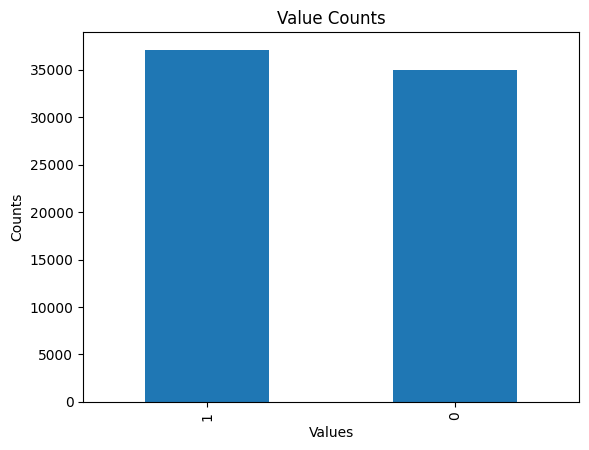

In [ ]:
# Distribution of output variable
required_data['label'].value_counts().plot(kind='bar')
plt.title('Value Counts')
plt.xlabel('Values')
plt.ylabel('Counts')

# Show the plot
plt.show()

In [ ]:
# Let's start with smaller data
data = required_data[0:1000]
data.head()

,text,label
0,No comment is expected from Barack Obama Membe...,1
1,Did they post their votes for Hillary already?,1
2,"Now, most of the demonstrators gathered last ...",1
3,A dozen politically active pastors came here f...,0
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",1


In [ ]:
data['label'].value_counts()

1    534
0    466
Name: label, dtype: int64

In [ ]:
data.isnull().sum()

text     0
label    0
dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import torch
from transformers import TrainingArguments, Trainer
from transformers import BertTokenizer, BertForSequenceClassification

In [ ]:
# import tokenizer and model
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=2)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
tokenizer

BertTokenizer(name_or_path='bert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=False, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=True),  added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}

In [ ]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
model = model.to("cuda")

In [ ]:
sample_data = ["I am having lunch", "I am reading"]
tokenizer(sample_data, padding=True, truncation=True, max_length=512)

{'input_ids': [[101, 1045, 2572, 2383, 6265, 102], [101, 1045, 2572, 3752, 102, 0]], 'token_type_ids': [[0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1], [1, 1, 1, 1, 1, 0]]}

In [ ]:
# split data
X = list(data['text'])
y = list(data['label'])
X_train, X_val, y_train, y_val = train_test_split(X, y , test_size=0.2, stratify=y)
X_train_tokenized = tokenizer(X_train, padding=True, truncation=True, max_length=512)
X_val_tokenized = tokenizer(X_val, padding=True, truncation=True, max_length=512)

In [ ]:
X_train_tokenized.keys()

dict_keys(['input_ids', 'token_type_ids', 'attention_mask'])

In [ ]:
X_train_tokenized['input_ids'][0]

[101,
 3050,
 3349,
 1006,
 26665,
 1007,
 1011,
 13359,
 2502,
 1057,
 1012,
 1055,
 1012,
 11825,
 5608,
 2000,
 4965,
 13507,
 2000,
 6501,
 2037,
 17188,
 1011,
 1998,
 5547,
 1996,
 3888,
 11774,
 2015,
 2027,
 12666,
 1011,
 2109,
 2000,
 2022,
 1037,
 7823,
 5271,
 2005,
 3889,
 13017,
 1012,
 3728,
 1010,
 2010,
 3105,
 2038,
 5407,
 6082,
 1010,
 2002,
 2758,
 1010,
 1999,
 2112,
 2138,
 1997,
 2343,
 6221,
 8398,
 1012,
 1523,
 1045,
 2131,
 4455,
 2006,
 1037,
 3679,
 3978,
 1998,
 2009,
 4050,
 4627,
 2007,
 1010,
 1520,
 1045,
 2123,
 1521,
 1056,
 2215,
 2000,
 3066,
 2007,
 2023,
 4450,
 14978,
 2151,
 2062,
 1521,
 1010,
 1524,
 2056,
 13017,
 1010,
 4341,
 3208,
 2005,
 3393,
 2135,
 2167,
 2637,
 1010,
 2029,
 3084,
 20478,
 11825,
 6501,
 2075,
 1998,
 8521,
 3001,
 1012,
 8398,
 1521,
 1055,
 8579,
 7698,
 2006,
 6206,
 7521,
 2083,
 3706,
 1011,
 2039,
 17615,
 1998,
 3675,
 7285,
 2038,
 16697,
 1996,
 1057,
 1012,
 1055,
 1012,
 4910,
 4753,
 1010,
 2073,
 2004,


In [ ]:
"""
  - To finetune the bert model on custom dataset we need to create dataset in torch
  - We are bulding toch dataset
"""

class Dataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        if self.labels:
          item['labels'] = torch.tensor(self.labels[idx])
          return item

    def __len__(self):
        return len(self.encodings['input_ids'])


In [ ]:
train_dataset = Dataset(X_train_tokenized, y_train)
val_dataset = Dataset(X_val_tokenized, y_val)
# test_dataset = IMDbDataset(test_encodings, test_labels)

In [ ]:
train_dataset[5]

{'input_ids': tensor([  101,  1996,  2206,  8635,  2020,  6866,  2000,  1996, 20119, 10474,
          6115,  1997,  1057,  1012,  1055,  1012,  2343,  6221,  8398,  1010,
          1030,  2613,  5280, 19058, 24456,  2361,  1998,  1030,  8962,  2271,
          1012,  1996, 10740,  5228,  2024,  2010,  2219,  1012, 26665,  2038,
          2025,  5493,  1996,  8635,  2030,  4484,  2037, 10640,  1012,  1030,
          2613,  5280, 19058, 24456,  2361,  1024,  1011,  2175,  2131,  1996,
          2047,  2338,  2006,  4080,  4027,  2011,  4422, 11382, 13728, 13775,
          2063,  1012,  1012,  1012,  2428,  2204,  1012,  1030,  4419,  5685,
         19699,  9013,  5104,  1031,  5511,  2692,  2620,  9765,  1033,  1011,
          2120,  7247,  6496, 19451,  2154,  1011,  1523,  1037,  2154,  2008,
          2097,  2444,  1999,  1999,  7011,  8029,   999,  1524,  2285,  1021,
          1010,  3874,  1031,  2531,  2549,  9765,  1033,  1011,  2651,  1010,
          2256,  2972,  3842, 19623,  2

In [ ]:
# Define evaluation function
def evaluation_metrics(p):
  print(type(p))
  pred, labels = p
  pred = np.argmax(pred, axis=1)

  accuracy = accuracy_score(y_true = labels, y_pred=pred)
  recall = recall_score(y_true = labels, y_pred=pred)
  precision = precision_score(y_true = labels, y_pred=pred)
  f1= f1_score(y_true = labels, y_pred=pred)
  return {
      "accuracy":accuracy,
      "precision":precision,
      "recall":recall,
      "f1":f1
  }

In [ ]:
!pip install transformers[torch]
!pip install accelerate -U

In [ ]:
# Define trainer
args = TrainingArguments(
    output_dir = 'output',
    num_train_epochs=5,
    per_device_train_batch_size=8
)

trainer = Trainer(
    model=model,
    args = args,
    train_dataset = train_dataset,
    eval_dataset=val_dataset,
    compute_metrics =  evaluation_metrics
)

In [ ]:
trainer.train()

Step,Training Loss
500,0.102100


TrainOutput(global_step=500, training_loss=0.10214918518066406, metrics={'train_runtime': 402.3757, 'train_samples_per_second': 9.941, 'train_steps_per_second': 1.243, 'total_flos': 1052444221440000.0, 'train_loss': 0.10214918518066406, 'epoch': 5.0})

In [ ]:
trainer.evaluate()

<class 'transformers.trainer_utils.EvalPrediction'>


{'eval_loss': 0.19298610091209412,
 'eval_accuracy': 0.965,
 'eval_precision': 0.9716981132075472,
 'eval_recall': 0.9626168224299065,
 'eval_f1': 0.9671361502347416,
 'eval_runtime': 6.6306,
 'eval_samples_per_second': 30.163,
 'eval_steps_per_second': 3.77,
 'epoch': 5.0}

In [ ]:
np.set_printoptions(suppress=True)

In [ ]:
# Test the model
text = "earch will become computer free in 10 days"
inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt").to('cuda')
output = model(**inputs)
print(output)
predictions = torch.nn.functional.softmax(output.logits, dim=-1)
print(predictions)
predictions = predictions.cpu().detach().numpy()
predictions

SequenceClassifierOutput(loss=None, logits=tensor([[-3.7495,  3.7127]], device='cuda:0', grad_fn=<AddmmBackward0>), hidden_states=None, attentions=None)
tensor([[0.0230, 0.9762]], device='cuda:0', grad_fn=<SigmoidBackward0>)


array([[0.02298861, 0.9761698 ]], dtype=float32)

In [ ]:
trainer.save_model("custom_model")

In [ ]:
# Test custom model
fine_tunned_model = BertForSequenceClassification.from_pretrained("/content/custom_model")

In [ ]:
fine_tunned_model.to('cuda')

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12,

In [ ]:
# Test the fine tunned model
text = "that was good point"
inputs = tokenizer(text, padding=True, truncation=True, return_tensors="pt").to('cuda')
output = fine_tunned_model(**inputs)
print(output.logits)
predictions = torch.nn.functional.softmax(output.logits, dim=-1)
print(predictions)
predictions = predictions.cpu().detach().numpy()
predictions

tensor([[-3.1517,  3.2872]], device='cuda:0', grad_fn=<AddmmBackward0>)
tensor([[0.0016, 0.9984]], device='cuda:0', grad_fn=<SoftmaxBackward0>)


array([[0.0015956 , 0.99840444]], dtype=float32)